In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fruits = pd.read_table('../datasets/fruit/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [7]:
fruits.shape

(59, 7)

In [8]:
len(fruits)

59

In [9]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [17]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

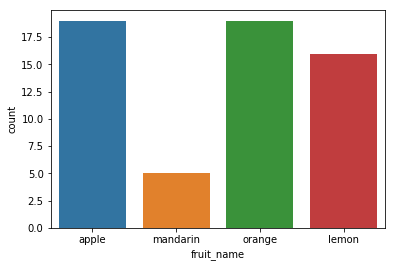

In [18]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

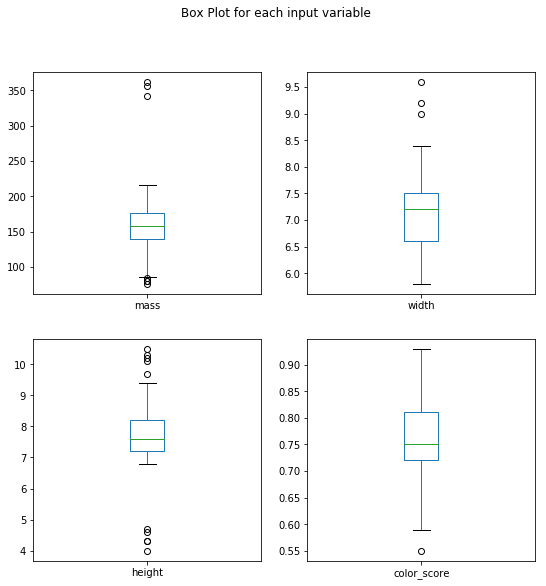

In [19]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
 title='Box Plot for each input variable')
plt.show()

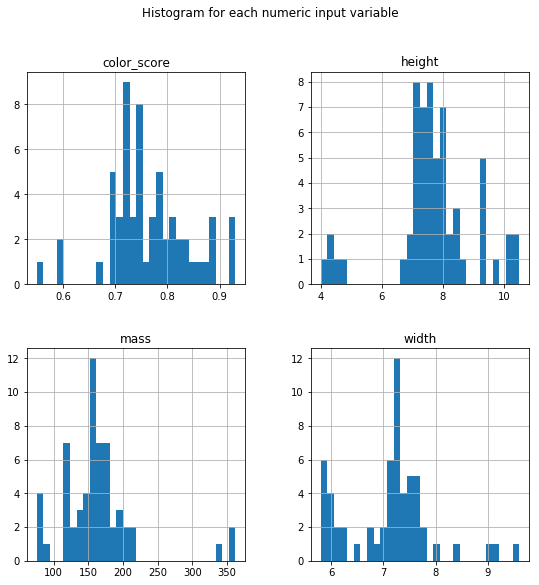

In [24]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

In [29]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
 .format(clf.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
 .format(clf.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


## 决策树

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of decision tree on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of decision tree on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of decision tree on training set: 1.00
Accuracy of decision tree on test set: 0.73


## K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
 .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
 .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


## 线性判别分析

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
 .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
 .format(lda.score(x_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


## 高斯朴素贝叶斯

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
 .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
 .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


## SVM

In [48]:
from sklearn.svm import SVC

svm = SVC().fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
 .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
 .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.33


### k-NN 算法是我们尝试过的最准确的模型, 绘制 k-NN 分类器的决策边界

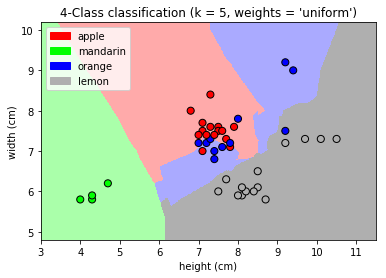

In [53]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import numpy as np

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
 
    mesh_step_size = .01 # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
        % (n_neighbors, weights)) 
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')